# AE102 Data Analysis Project.

## Topic- Olympics Data Set Analysis.

### Team Members - 
### Amit Kumar (210010008)
### Lagnesh Mahapatra (210010038)
### Mayank Bajaj (210010039)
### Yash Dnyaneshwar Kotkar(210010077)

So, let's start with the project.
So, we all know what Olympics are, but still I will give brief introduction of Olympics.
We won't delve into the History of Olympics, because that is not relevant here, rather I shall talk about the Games in general.


 Olympics is one of the biggest sporting events featuring summer and winter sports competitions (NOTE: in our project we have considered the data of Summer Olympics only.) where thousands of athletes from around the world participate in a variety of competitions. More than 200 nations participate.The Olympic Games are usually held every four years, alternating between the Summer and Winter Olympics every two years in the four-year period. The International Olympic Committee (IOC) as formed in 1894 and the first modern Olympics was held in 1896. 

Now, that we know about Olympics in brief, let's start with what data sets are we going to analyze in this Project . In the First half of our project we try to explore the relationship between top performing nations in Olympics and their economies, in particular their GDP per Capita and Total GDP. In the second half of the project we have worked upon the Data sets involving "Sprint Time" and "Reaction Time" of different atheletes across different types of Running Events ( 200m , 400m ).

In [67]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Part1: Effect of Economy
Is there a relatioship between the Economy size and the performance of a nation at the Olympics.In studies and data analysis done on similar datasets it has been observed that the size of the economy is strongly linked to a country's performance at the Olympics. In general, the bigger the size of a country's economy, the more the medals, with very few exceptions such as Kenya, Ethiopia and Ukraine.(These exceptions arise due to the fact that we have considered only the "Economy" factor but there are a lot of other factors such as "HDI", "Population", "Political Freedom", etc.) We will prove the same in our data analysis project.

### Reading CSV file and extracting data for 2004 Olympics

In [327]:
data_2004=pd.read_csv('2004-economy.csv',header=None,sep=',')

In [331]:
data_2004.columns=['Country','Gold','Silver','Bronze','Total','Total GDP-2002(in billion$)','Per capita GDP-2002(in $)','Total GDP-2003(in billion$)','Per capita GDP-2003(in $)']

In [332]:
data_2004

,Country,Gold,Silver,Bronze,Total,Total GDP-2002(in billion$),Per capita GDP-2002(in $),Total GDP-2003(in billion$),Per capita GDP-2003(in $)
0,United States,36,39,26,101,10940.0,38023.16,11460.0,39496.49
1,China,32,17,14,63,1470.0,1148.51,1660.0,1288.64
2,Russia,28,26,36,90,345.5,2377.53,430.3,2975.13
3,Australia,17,16,17,50,394.6,20082.48,466.5,23447.03
4,Japan,16,9,12,37,4120.0,32289.35,4450.0,34808.39
5,Germany,13,16,20,49,2070.0,25077.73,2500.0,30243.58
6,France,11,9,13,33,1490.0,24177.34,1840.0,29568.39
7,Italy,10,11,11,32,1270.0,22270.14,1570.0,27465.68
8,South Korea,9,12,9,30,627.2,13165.07,702.7,14672.86
9,Great Britain,9,9,12,30,1780.0,29982.62,2050.0,34383.95


### Creating function for collecting samples from a given dataset

In [333]:
def collect_samples(data, n_samples, n_people):#collecting sample averages from a given population dataset
    avgs = np.zeros(n_people)
    for i in range(n_people):
        sample = np.random.choice(data, n_samples, replace=False)
        avgs[i] = np.mean(sample)
    return avgs

In [388]:
#taking out my 3 random variables
GDP_per_capita_2004=data_2004['Per capita GDP-2003(in $)']#random variable 1 is per capita GDP in 2003
Total_medals_2004=data_2004['Total']#random variable 2 is Total number of medals earned in Athens 2004 Olympics
GDP_total_2004=data_2004['Total GDP-2003(in billion$)']#random variable 3 is Total GDP in 2003

### Showing distribution of per capita GDP in 2003

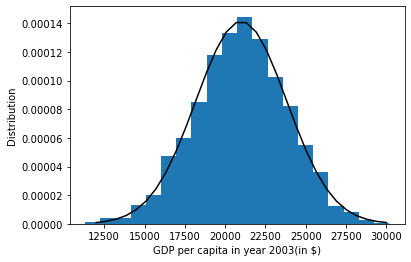

In [389]:
#seeing if my distribution is a normal distribution or not
xs = np.linspace(12000, 30000, 30)
mean_xbar = np.mean(GDP_per_capita_2004)
std_xbar = np.std(GDP_per_capita_2004, ddof=1)/np.sqrt(30) # 30 is the sample size 
ys = stats.norm.pdf(xs,mean_xbar,std_xbar)

#ploting my sample averages along with normal distribution with the same avg and standard deviation
avgs=collect_samples(GDP_per_capita_2004,12,2000)
plt.hist(avgs, bins=20,density=True)
plt.plot(xs,ys,'k-');
plt.xlabel('GDP per capita in year 2003(in $)')
plt.ylabel('Distribution');

So looks like the distribution we get is fairly close to a normal distribution!

### Calculating the 95% Confidence Interval of this dataset

In [390]:
# function to calculate the 95% CI of data, this function wil be used later too
def compute_CI_95_mean(dataset, n_samples):
    sample = np.random.choice(dataset, n_samples, replace=False)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    z95 = stats.norm.ppf(1 - 0.025)
    ci_lo = sample_mean - z95*sample_std/np.sqrt(n_samples)
    ci_hi = sample_mean + z95*sample_std/np.sqrt(n_samples)
    return ci_lo, ci_hi

In [391]:
compute_CI_95_mean(GDP_per_capita_2004,10)

(3085.413432927111, 20013.62656707289)

### Showing distribution of Total GDP in 2003

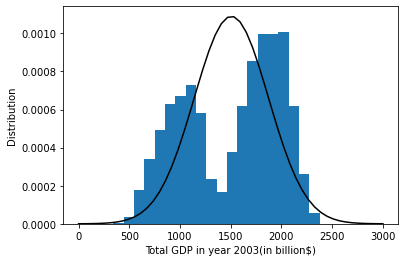

In [393]:
# using methods as previous rv to do the same for this one
xs = np.linspace(0, 3000, 50)
mean_xbar = np.mean(GDP_total_2004)
std_xbar = np.std(GDP_total_2004, ddof=1)/np.sqrt(50) # 50 is the sample size 
ys = stats.norm.pdf(xs,mean_xbar,std_xbar)

avgs=collect_samples(GDP_total_2004,12,10000)
plt.hist(avgs, bins=20,density=True)
plt.plot(xs,ys,'k-');
plt.xlabel('Total GDP in year 2003(in billion$)')
plt.ylabel('Distribution');

The distribution has two individual peaks and is not close to a normal distribution.

### Calculating the 95% Confidence Interval of this dataset

In [396]:
compute_CI_95_mean(GDP_total_2004,12)

(126.44394022196366, 3786.93939311137)

### Showing distribution of Total Medals won in Athens 2004 Olympics

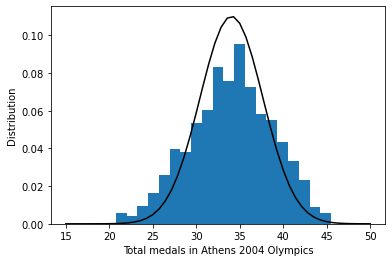

In [398]:
xs = np.linspace(15, 50, 50)
mean_xbar = np.mean(Total_medals_2004)
std_xbar = np.std(Total_medals_2004, ddof=1)/np.sqrt(50) # 50 is the sample size 
ys = stats.norm.pdf(xs,mean_xbar,std_xbar)

avgs=collect_samples(Total_medals_2004,12,1000)
plt.hist(avgs, bins=20,density=True)
plt.plot(xs,ys,'k-');
plt.xlabel('Total medals in Athens 2004 Olympics')
plt.ylabel('Distribution');

So looks like the distribution we get is fairly close to a normal distribution!

### Calculating the 95% Confidence Interval of this dataset

In [399]:
compute_CI_95_mean(Total_medals_2004,12)

(15.514936898586178, 44.651729768080486)

### Analysing relations between pairs of Random Variables

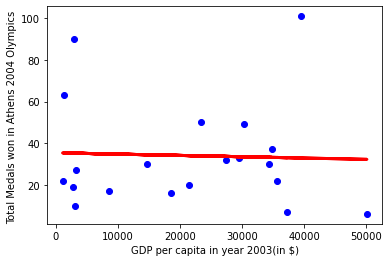

In [400]:
#we plot the two rv, and find the best possible linear fit for the same
plt.plot(GDP_per_capita_2004,Total_medals_2004,'bo')
c1,c0=np.polyfit(GDP_per_capita_2004,Total_medals_2004,deg=1)
plt.plot(GDP_per_capita_2004,c0 + c1*GDP_per_capita_2004,'r-',lw=3)
plt.xlabel("GDP per capita in year 2003(in $)")
plt.ylabel("Total Medals won in Athens 2004 Olympics ");

Function to find the correlation coefficient to check if the linear relation we have is a goodfit or not. The closer the value of R2 to 1 the better the fit.

In [360]:
def compute_R2(x,y):
    b1,b0=np.polyfit(x,y,deg=1)
    y_bar=np.mean(y)
    y_hat=b0+b1*x
    sst=np.sum((y-y_bar)**2)
    ssr=np.sum((y_hat-y_bar)**2)
    r2=ssr/sst
    return r2

In [437]:
R2_per_capita_2004=compute_R2(GDP_per_capita_2004,Total_medals_2004)
print(R2_per_capita_2004)

0.0014349155422521999


Thus we see that a linear relation between the per capita GDP of a country and its total number of medals earned is very bad fit and we cannot infer that the medals earned is related to the per capita GDP

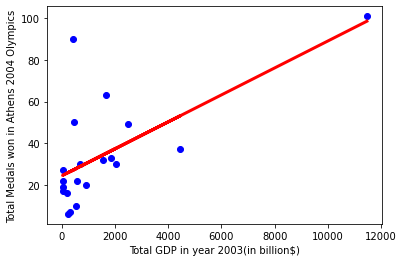

In [402]:
plt.plot(GDP_total_2004,Total_medals_2004,'bo')
c1,c0=np.polyfit(GDP_total_2004,Total_medals_2004,deg=1)
plt.plot(GDP_total_2004,c0 + c1*GDP_total_2004,'r-',lw=3)
plt.xlabel("Total GDP in year 2003(in billion$)")
plt.ylabel("Total Medals won in Athens 2004 Olympics");

In [438]:
R2_total_2004=compute_R2(GDP_total_2004,Total_medals_2004)
print(R2_total_2004)

0.4303721156054947


Therefore we see that the linear relation between the total GDP and the number of medals earned is better than that compared to GDP per capita but still not as good as we want it to infer anything out of it.

### Reading CSV file and extracting data for 2012 Olympics

In [366]:
data_2012=pd.read_csv('2012-economy.csv',header=None,sep=',')

In [367]:
data_2012.columns=['Country','Gold','Silver','Bronze','Total','Total GDP-2010(in billion$)','Per capita GDP-2010(in $)','Total GDP-2011(in billion$)','Per capita GDP-2011(in $)']

In [368]:
data_2012

,Country,Gold,Silver,Bronze,Total,Total GDP-2010(in billion$),Per capita GDP-2010(in $),Total GDP-2011(in billion$),Per capita GDP-2011(in $)
0,United States,47,27,30,104,15049.0,48403.3,15599.0,49829.1
1,China,38,31,22,91,6090.0,4499.8,7550.0,5553.2
2,Great Britain*,29,18,18,65,1884.0,30027.0,1911.0,30212.0
3,Russia,19,21,27,67,1633.1,11406.2,2046.6,14271.7
4,South Korea,13,9,8,30,1144.0,23085.4,1253.2,25095.1
5,Germany,11,20,13,44,3402.4,42641.4,3748.7,46852.9
6,France,11,11,13,35,2647.4,42178.6,2864.7,45420.0
7,Australia,8,15,12,35,1251.8,56453.8,1513.7,67222.1
8,Italy,8,9,11,28,2137.8,35805.4,2294.6,38273.8
9,Hungary,8,4,6,18,131.1,13095.2,141.1,14130.7


In [404]:
#taking out my 3 random variables
GDP_per_capita_2012=data_2012['Per capita GDP-2011(in $)']#random variable 1 is per capita GDP in 2011
Total_medals_2012=data_2012['Total']#random variable 2 is Total number of medals earned in London 2012 Olympics
GDP_total_2012=data_2012['Total GDP-2011(in billion$)']#random variable 3 is Total GDP in 2011

### Showing distribution of per capita GDP in 2011

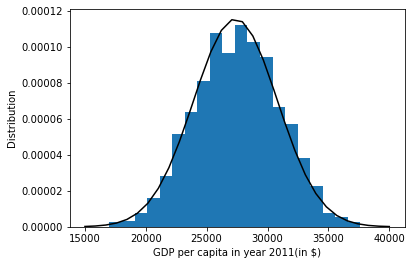

In [407]:
#seeing if my distribution is a normal distribution or not
xs = np.linspace(15000, 40000, 30)
mean_xbar = np.mean(GDP_per_capita_2012)
std_xbar = np.std(GDP_per_capita_2012, ddof=1)/np.sqrt(30) # 30 is the sample size 
ys = stats.norm.pdf(xs,mean_xbar,std_xbar)

#ploting my sample averages along with normal distribution with the same avg and standard deviation
avgs=collect_samples(GDP_per_capita_2012,12,2000)
plt.hist(avgs, bins=20,density=True)
plt.plot(xs,ys,'k-');
plt.xlabel('GDP per capita in year 2011(in $)')
plt.ylabel('Distribution');

So looks like the distribution we get is fairly close to a normal distribution!

In [408]:
compute_CI_95_mean(GDP_per_capita_2012,10)

(18310.9110485372, 43469.0489514628)

### Showing distribution of Total GDP in 2011

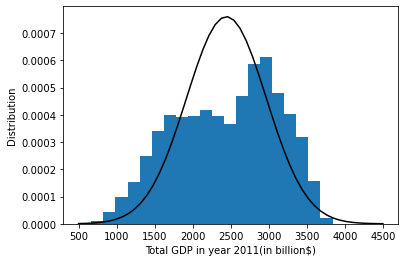

In [413]:
# using methods as previous rv to do the same for this one
xs = np.linspace(500, 4500, 50)
mean_xbar = np.mean(GDP_total_2012)
std_xbar = np.std(GDP_total_2012, ddof=1)/np.sqrt(50) # 50 is the sample size 
ys = stats.norm.pdf(xs,mean_xbar,std_xbar)

avgs=collect_samples(GDP_total_2012,12,10000)
plt.hist(avgs, bins=20,density=True)
plt.plot(xs,ys,'k-');
plt.xlabel('Total GDP in year 2011(in billion$)')
plt.ylabel('Distribution');

The distribution has three individual peaks and is not close to a normal distribution.

### Calculating the 95% Confidence Interval of this dataset

In [415]:
compute_CI_95_mean(GDP_total_2012,12)

(453.2989334912663, 5575.401066508734)

### Showing distribution of Total Medals won in London 2012 Olympics

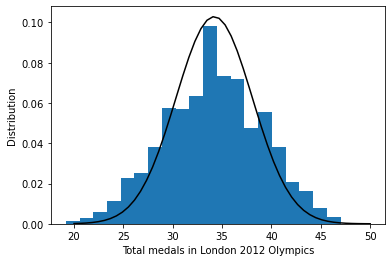

In [419]:
xs = np.linspace(20, 50, 50)
mean_xbar = np.mean(Total_medals_2012)
std_xbar = np.std(Total_medals_2012, ddof=1)/np.sqrt(50) # 50 is the sample size 
ys = stats.norm.pdf(xs,mean_xbar,std_xbar)

avgs=collect_samples(Total_medals_2012,12,1000)
plt.hist(avgs, bins=20,density=True)
plt.plot(xs,ys,'k-');
plt.xlabel('Total medals in London 2012 Olympics')
plt.ylabel('Distribution');

So looks like the distribution we get is fairly close to a normal distribution!

### Calculating the 95% Confidence Interval of this dataset

In [420]:
compute_CI_95_mean(Total_medals_2012,12)

(23.505015631086515, 60.494984368913485)

### Analysing relations between pairs of Random Variables

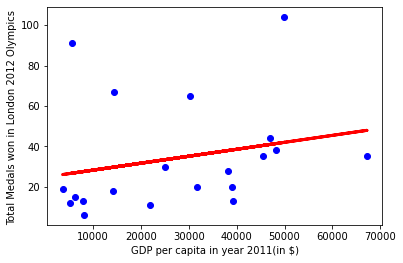

In [421]:
#we plot the two rv, and find the best possible linear fit for the same
plt.plot(GDP_per_capita_2012,Total_medals_2012,'bo')
c1,c0=np.polyfit(GDP_per_capita_2012,Total_medals_2012,deg=1)
plt.plot(GDP_per_capita_2012,c0 + c1*GDP_per_capita_2012,'r-',lw=3)
plt.xlabel("GDP per capita in year 2011(in $)")
plt.ylabel("Total Medals won in London 2012 Olympics ");

In [439]:
R2_per_capita_2012=compute_R2(GDP_per_capita_2012,Total_medals_2012)
print(R2_per_capita_2012)

0.05632768493502198


Thus we see that a linear relation between the per capita GDP of a country and its total number of medals earned is very bad fit and we cannot infer that the medals earned is related to the per capita GDP

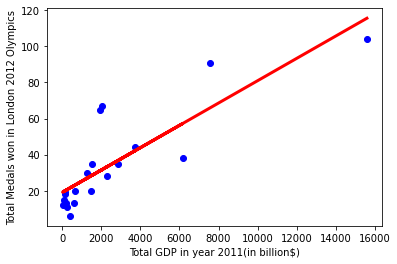

In [423]:
plt.plot(GDP_total_2012,Total_medals_2012,'bo')
c1,c0=np.polyfit(GDP_total_2012,Total_medals_2012,deg=1)
plt.plot(GDP_total_2012,c0 + c1*GDP_total_2012,'r-',lw=3)
plt.xlabel("Total GDP in year 2011(in billion$)")
plt.ylabel("Total Medals won in London 2012 Olympics");

In [440]:
R2_total_2012=compute_R2(GDP_total_2012,Total_medals_2012)
print(R2_total_2012)

0.7013041345075147


Therefore we see that the linear relation between the total GDP and the number of medals earned is better than that compared to GDP per capita but still not as good as we want it to infer anything out of it.

### Reading CSV file and extracting data for 2020 Olympics

In [324]:
data_2020=pd.read_csv('2020-economy.csv',header=None,sep=',')

In [325]:
data_2020.columns=['Country','Gold','Silver','Bronze','Total','Total GDP-2018(in billion$)','Per capita GDP-2018(in $)','Total GDP-2019(in billion$)','Per capita GDP-2019(in $)']

In [326]:
data_2020

,Country,Gold,Silver,Bronze,Total,Total GDP-2018(in billion$),Per capita GDP-2018(in $),Total GDP-2019(in billion$),Per capita GDP-2019(in $)
0,United States,39,41,33,113,20527.2,62769.7,21372.6,65051.9
1,China,38,32,18,88,13841.8,9849.0,14340.6,10170.1
2,Japan*,27,14,17,58,5036.9,39818.8,5135.9,40689.8
3,Great Britain,22,20,22,64,2218.0,33388.0,2255.0,33763.0
4,ROC,20,28,23,71,1653.0,11261.7,1690.1,11516.6
5,Australia,17,7,22,46,1421.2,56460.9,1392.3,54476.9
6,Netherlands,10,12,14,36,774.0,44916.7,813.1,46875.8
7,France,10,12,11,33,2789.7,43021.4,2728.8,41989.7
8,Germany,10,11,16,37,3979.1,47995.4,3888.8,46800.2
9,Italy,10,10,20,40,2093.1,34921.0,2005.1,33521.3


In [425]:
#taking out my 3 random variables
GDP_per_capita_2020=data_2020['Per capita GDP-2019(in $)']#random variable 1 is per capita GDP in 2019
Total_medals_2020=data_2020['Total']#random variable 2 is Total number of medals earned in Tokyo 2020 Olympics
GDP_total_2020=data_2020['Total GDP-2019(in billion$)']#random variable 3 is Total GDP in 2019

### Showing distribution of per capita GDP in 2019

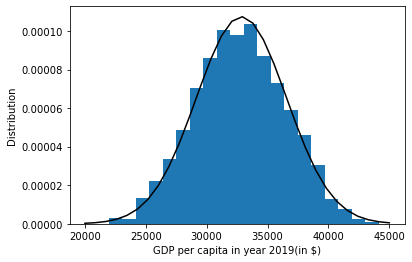

In [426]:
#seeing if my distribution is a normal distribution or not
xs = np.linspace(20000, 45000, 30)
mean_xbar = np.mean(GDP_per_capita_2020)
std_xbar = np.std(GDP_per_capita_2020, ddof=1)/np.sqrt(30) # 30 is the sample size 
ys = stats.norm.pdf(xs,mean_xbar,std_xbar)

#ploting my sample averages along with normal distribution with the same avg and standard deviation
avgs=collect_samples(GDP_per_capita_2020,12,2000)
plt.hist(avgs, bins=20,density=True)
plt.plot(xs,ys,'k-');
plt.xlabel('GDP per capita in year 2019(in $)')
plt.ylabel('Distribution');

So looks like the distribution we get is fairly close to a normal distribution!

In [427]:
compute_CI_95_mean(GDP_per_capita_2020,10)

(16019.547208804186, 45554.17279119581)

### Showing distribution of Total GDP in 2019

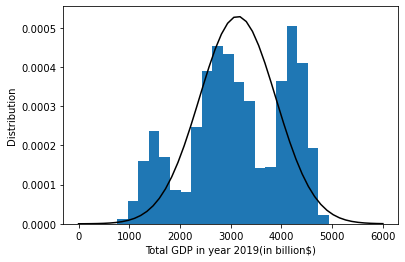

In [428]:
# using methods as previous rv to do the same for this one
xs = np.linspace(0, 6000, 50)
mean_xbar = np.mean(GDP_total_2020)
std_xbar = np.std(GDP_total_2020, ddof=1)/np.sqrt(50) # 50 is the sample size 
ys = stats.norm.pdf(xs,mean_xbar,std_xbar)

avgs=collect_samples(GDP_total_2020,12,10000)
plt.hist(avgs, bins=20,density=True)
plt.plot(xs,ys,'k-');
plt.xlabel('Total GDP in year 2019(in billion$)')
plt.ylabel('Distribution');

The distribution has three individual peaks and is not close to a normal distribution.

In [429]:
compute_CI_95_mean(GDP_total_2020,12)

(709.5089978481928, 5107.341002151807)

### Showing distribution of Total Medals won in Tokyo 2020 Olympics

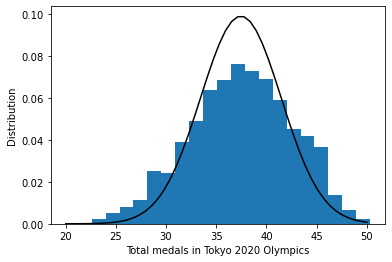

In [430]:
xs = np.linspace(20, 50, 50)
mean_xbar = np.mean(Total_medals_2020)
std_xbar = np.std(Total_medals_2020, ddof=1)/np.sqrt(50) # 50 is the sample size 
ys = stats.norm.pdf(xs,mean_xbar,std_xbar)

avgs=collect_samples(Total_medals_2020,12,1000)
plt.hist(avgs, bins=20,density=True)
plt.plot(xs,ys,'k-');
plt.xlabel('Total medals in Tokyo 2020 Olympics')
plt.ylabel('Distribution');

So looks like the distribution we get is fairly close to a normal distribution!

### Calculating the 95% Confidence Interval of this dataset

In [431]:
compute_CI_95_mean(Total_medals_2020,12)

(24.063057757767403, 59.770275575565925)

### Analysing relations between pairs of Random Variables

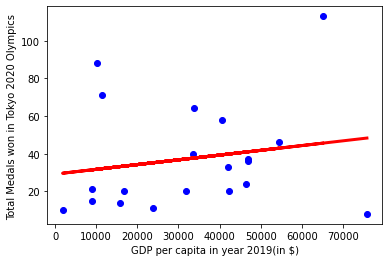

In [432]:
#we plot the two rv, and find the best possible linear fit for the same
plt.plot(GDP_per_capita_2020,Total_medals_2020,'bo')
c1,c0=np.polyfit(GDP_per_capita_2020,Total_medals_2020,deg=1)
plt.plot(GDP_per_capita_2020,c0 + c1*GDP_per_capita_2020,'r-',lw=3)
plt.xlabel("GDP per capita in year 2019(in $)")
plt.ylabel("Total Medals won in Tokyo 2020 Olympics ");

In [441]:
R2_per_capita_2020=compute_R2(GDP_per_capita_2020,Total_medals_2020)
print(R2_per_capita_2020)

0.032614942479561024


Thus we see that a linear relation between the per capita GDP of a country and its total number of medals earned is very bad fit and we cannot infer that the medals earned is related to the per capita GDP

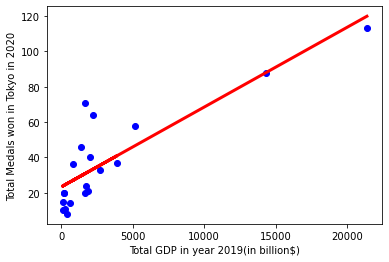

In [435]:
plt.plot(GDP_total_2020,Total_medals_2020,'bo')
c1,c0=np.polyfit(GDP_total_2020,Total_medals_2020,deg=1)
plt.plot(GDP_total_2020,c0 + c1*GDP_total_2020,'r-',lw=3)
plt.xlabel("Total GDP in year 2019(in billion$)")
plt.ylabel("Total Medals won in Tokyo in 2020");

In [442]:
R2_total_2020=compute_R2(GDP_total_2020,Total_medals_2020)
print(R2_total_2020)

0.7169120542799632


Therefore we see that the linear relation between the total GDP and the number of medals earned is better than that compared to GDP per capita but still not as good as we want it to infer anything out of it.

### Conclusion

In this part of our project we have done data analysis on the effect of economy on the total medal won by top 20 countries in the years 2004,2012 and 2020. When we look at the list of top 20 countries in every Olympic we generally see rich countries tend to always be on the list and wonder whether there is relation between the economies of these countries effect their performance, using linear regression we try to infer exactly this.From the analysis we can clearly conclude that neither total GDP nor per capita GDP has a clear linear relation with the total number of medals won even though using total GDP gives us a better sense of a relation.

## Part 2: Relation between Reaction Time and Sprint Time

In [239]:
h200m_df=pd.read_csv('heat200mfinal.csv', header= None , sep = ',')

In [240]:
h200m_df.columns=['Athelete','Country','Reaction Time','Sprint Time']

In [288]:
h200m_df

,Athelete,Country,Reaction Time,Sprint Time
0,Rasheed Dwyer,Jamaica,0.163,20.31
1,Divine Oduduru,Nigeria,0.129,20.36
2,Anaso Jobodwana,South Africa,0.119,20.78
3,Jorge Vides,Brazil,0.161,20.94
4,Fodé Sissoko,Mali,0.167,21.00
5,Shōta Iizuka,Japan,0.148,21.02
6,José Andrés Salazar,El Salvador,0.145,21.66
7,Jereem Richards,Trinidad and Tobago,0.187,20.52
8,Shaun Maswanganyi,South Africa,0.142,20.58
9,Taymir Burnet,Netherlands,0.137,20.60


In [289]:
rtime_avg = h200m_df["Reaction Time"].mean()
rtime_avg ## This is the mean Reaction Time in 200m heats.

0.1533913043478261

In [290]:
stime_avg = h200m_df["Sprint Time"].mean()
stime_avg ##This is the mean Sprint Time in 200m heats.

20.69869565217391

### Sampling the Data (as we don't have the access to the entore dataset, rather only a small part of it and we have to reach a conclusion based on that small dataset.) 

In [291]:
rtime200m= h200m_df['Reaction Time']

In [292]:
def collect_samples(data,n_samples,n_times):
    avgs=np.zeros(n_times)
    for i in range (n_times):
        sample=np.random.choice(data,n_samples,replace=False)
        avgs[i]=np.mean(sample)
    return avgs

In [293]:
avgs=collect_samples(rtime200m,25,10000)

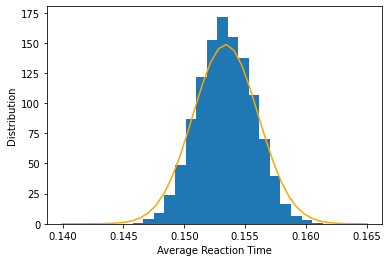

In [294]:
xs = np.linspace(0.140,0.165, 40)
mean_xbar = np.mean(rtime200m)
std_xbar = np.std(rtime200m, ddof=1)/np.sqrt(40) # 40 is the sample size 
ys = stats.norm.pdf(xs,mean_xbar,std_xbar)

plt.hist(avgs,bins=20,density=True)
plt.ylabel("Distribution")
plt.xlabel("Average Reaction Time")
plt.plot(xs,ys,'orange')
plt.show()

So, we can clearly see that the averages of the reaction time which in this case is our random variable resembles a gaussian distribution. 

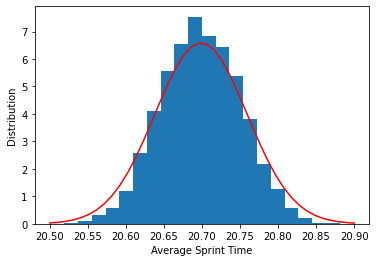

In [295]:
stime200m= h200m_df['Sprint Time']
stime200m
collect_samples(stime200m,25,10000)
avgs=collect_samples(stime200m,25,10000)
plt.hist(avgs,bins=20, density=True)
xs = np.linspace(20.5,20.9, 40)
mean_xbar = np.mean(stime200m)
std_xbar = np.std(stime200m, ddof=1)/np.sqrt(40) # 40 is the sample size 
ys = stats.norm.pdf(xs,mean_xbar,std_xbar)
plt.ylabel("Distribution")
plt.xlabel("Average Sprint Time")
plt.plot(xs,ys,'red')
plt.show()

So, we can clearly see that the averages of the sprint time which in this case is our random variable resembles a gaussian distribution. 

In [296]:
def compute_CI_95_mean(dataset, n_samples):
    sample = np.random.choice(dataset, n_samples, replace=False)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    z95 = stats.norm.ppf(1 - 0.025)
    ci_lo = sample_mean - z95*sample_std/np.sqrt(n_samples)
    ci_hi = sample_mean + z95*sample_std/np.sqrt(n_samples)
    return ci_lo, ci_hi

In [297]:
compute_CI_95_mean(rtime200m,25) ## This is the 95% Confidence Interval for reaction time.  

(0.1495753154125543, 0.1631446845874457)

In [298]:
compute_CI_95_mean(stime200m,25) ## This is the 95% Confidence Interval for sprint time.

(20.55495572727213, 20.81704427272787)

### Regression: trying to model the relationship

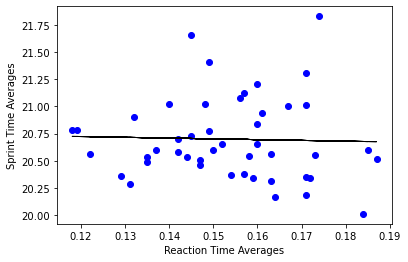

In [299]:
plt.plot(rtime200m,stime200m,'bo')
c1,c0=np.polyfit(rtime200m,stime200m,deg=1)
plt.plot(rtime200m,c0 + c1*rtime200m,'k-',lw=1)
plt.xlabel("Reaction Time Averages")
plt.ylabel("Sprint Time Averages");

In [300]:
def compute_R2(x,y):
    b1,b0=np.polyfit(x,y,deg=1)
    y_bar=np.mean(y)
    y_hat=b0+b1*x
    sst=np.sum((y-y_bar)**2)
    ssr=np.sum((y_hat-y_bar)**2)
    r2=ssr/sst
    return r2

In [301]:
compute_R2(rtime200m,stime200m)

0.0009962367880899771

Oh No! This is too bad of a fit, we can see that the coefficient of co-relation (R^2) is around 0.001. Therefore, we can say that there is no such "LINEAR" relationship between reaction time and sprint time of an athelete. Now, we will analyze the dataset from Semifinals of 200m (Tokyo Olympics.)

### So, let's import the Semi 200m dataset.

In [302]:
semi200m_df=pd.read_csv('semi200m.csv', header= None , sep = ',')

In [303]:
semi200m_df.columns=['Athelete','Country','Reaction Time','Sprint Time']
semi200m_df

,Athelete,Country,Reaction Time,Sprint Time
0,Erriyon Knighton,United States,0.172,20.02
1,Rasheed Dwyer,Jamaica,0.141,20.13
2,Divine Oduduru,Nigeria,0.140,20.16
3,Joseph Paul Amoah,Ghana,0.168,20.27
4,Femi Ogunode,Qatar,0.160,20.34
5,Fausto Desalu,Italy,0.149,20.43
6,Xie Zhenye,China,0.154,20.45
7,Anaso Jobodwana,South Africa,0.151,20.88
8,Aaron Brown,Canada,0.151,19.99
9,Joseph Fahnbulleh,Liberia,0.140,19.99


In [304]:
stime_avg = semi200m_df["Sprint Time"].mean()
stime_avg ##This is the mean Sprint Time in 200m semis.

20.28826086956522

In [305]:
rtime_avg = semi200m_df["Reaction Time"].mean()
rtime_avg ## This is the mean Reaction Time in 200m semis.

0.15108695652173915

In [306]:
rtimesemi200m= semi200m_df['Reaction Time']

In [307]:
stimesemi200m= semi200m_df['Sprint Time']

### Let's plot the average reaction time.

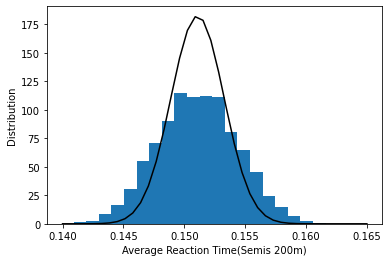

In [308]:
collect_samples(rtimesemi200m,10,10000)
avgs=collect_samples(rtimesemi200m,10,10000)
plt.hist(avgs,bins=20, density=True)
xs = np.linspace(0.140,0.165, 40)
mean_xbar = np.mean(rtimesemi200m)
std_xbar = np.std(rtimesemi200m, ddof=1)/np.sqrt(40) # 40 is the sample size 
ys = stats.norm.pdf(xs,mean_xbar,std_xbar)
plt.ylabel("Distribution")
plt.xlabel("Average Reaction Time(Semis 200m)")
plt.plot(xs,ys,'k')
plt.show()

So, we can clearly see that the averages of the reaction time which in this case is our random variable resembles a gaussian distribution. 

### Now, plotting the average sprint time.

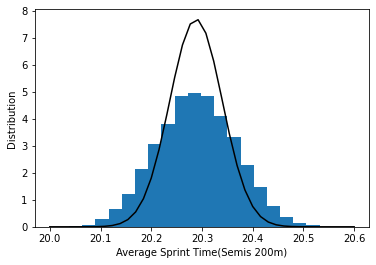

In [309]:
collect_samples(stimesemi200m,10,10000)
avgs=collect_samples(stimesemi200m,10,10000)
plt.hist(avgs,bins=20, density=True)
xs = np.linspace(20.0,20.6, 40)
mean_xbar = np.mean(stimesemi200m)
std_xbar = np.std(stimesemi200m, ddof=1)/np.sqrt(40) # 40 is the sample size 
ys = stats.norm.pdf(xs,mean_xbar,std_xbar)
plt.ylabel("Distribution")
plt.xlabel("Average Sprint Time(Semis 200m)")
plt.plot(xs,ys,'k')
plt.show()

So, we can clearly see that the averages of the sprint time which in this case is our random variable resembles a gaussian distribution. 

In [310]:
compute_CI_95_mean(rtimesemi200m,10) ##This is the 95% confidence interval of reaction time for semis200m

(0.1447134020310966, 0.1562865979689034)

In [311]:
compute_CI_95_mean(stimesemi200m,10) ##This is the 95% confidence interval of sprint time for semis200m

(20.04639987144236, 20.457600128557644)

### Again, let's try to model their relationship using linear regression.

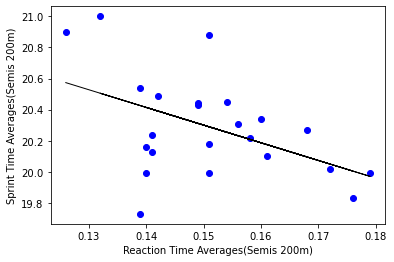

In [312]:
plt.plot(rtimesemi200m,stimesemi200m,'bo')
c1,c0=np.polyfit(rtimesemi200m,stimesemi200m,deg=1)
plt.plot(rtimesemi200m,c0 + c1*rtimesemi200m,'k-',lw=1)
plt.xlabel("Reaction Time Averages(Semis 200m)")
plt.ylabel("Sprint Time Averages(Semis 200m)");

In [313]:
compute_R2(rtimesemi200m,stimesemi200m)

0.2300523712565407

### Hmmm, interesting, we can see that as we analyze the semifinal dataset, the co-relation coefficient increases from 0.001 in heats 200m dataset to 0.23 in Semis dataset. Will this increase even more for the Finals dataset , let's find out..

### Importing the Finals dataset

In [314]:
finals200m_df=pd.read_csv('final200m.csv', header= None , sep = ',')

In [315]:
finals200m_df.columns=['Athelete','Country','Reaction Time','Sprint Time']
finals200m_df

,Athelete,Country,Reaction Time,Sprint Time
0,Andre De Grasse,Canada,0.135,19.62
1,Kenneth Bednarek,United States,0.165,19.68
2,Noah Lyles,United States,0.151,19.74
3,Erriyon Knighton,United States,0.159,19.93
4,Joseph Fahnbulleh,Liberia,0.141,19.98
5,Aaron Brown,Canada,0.157,20.20
6,Rasheed Dwyer,Jamaica,0.148,20.21
7,Jereem Richards,Trinidad and Tobago,0.149,20.39


In [316]:
stime_avg = finals200m_df["Sprint Time"].mean()
stime_avg ##This is the mean Sprint Time in 200m finals.

19.96875

In [317]:
rtime_avg = h200m_df["Reaction Time"].mean()
rtime_avg ##This is the mean Reaction Time in 200m heats.

0.1533913043478261

In [318]:
rtimefinals200m= finals200m_df['Reaction Time']

In [319]:
stimefinals200m= finals200m_df['Sprint Time']

### Let's plot the average reaction time for the Finals 200m.

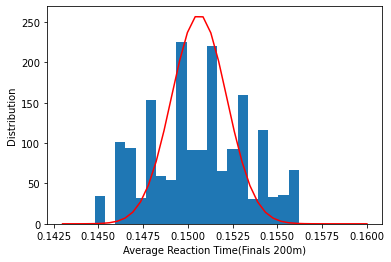

In [320]:
collect_samples(rtimefinals200m,5,10000)
avgs=collect_samples(rtimefinals200m,5,10000)
plt.hist(avgs,bins=20, density=True)
xs = np.linspace(0.143,0.160, 40)
mean_xbar = np.mean(rtimefinals200m)
std_xbar = np.std(rtimefinals200m, ddof=1)/np.sqrt(40) # 40 is the sample size 
ys = stats.norm.pdf(xs,mean_xbar,std_xbar)
plt.ylabel("Distribution")
plt.xlabel("Average Reaction Time(Finals 200m)")
plt.plot(xs,ys,'red')
plt.show()

So, we can clearly see that the averages of the reaction time which in this case is our random variable resembles a gaussian distribution. 

### Now, let's do the same for average Sprint time.

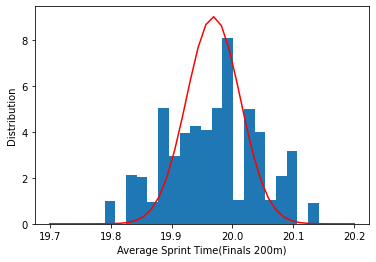

In [321]:
collect_samples(stimefinals200m,5,10000)
avgs=collect_samples(stimefinals200m,5,10000)
plt.hist(avgs,bins=20, density=True)
xs = np.linspace(19.7,20.2, 40)
mean_xbar = np.mean(stimefinals200m)
std_xbar = np.std(stimefinals200m, ddof=1)/np.sqrt(40) # 40 is the sample size 
ys = stats.norm.pdf(xs,mean_xbar,std_xbar)
plt.ylabel("Distribution")
plt.xlabel("Average Sprint Time(Finals 200m)")
plt.plot(xs,ys,'red')
plt.show()

So, we can clearly see that the averages of the sprint time which in this case is our random variable resembles a gaussian distribution. 

### Finally, let's try to model the relation between reaction time and sprint time for Finals 200m.

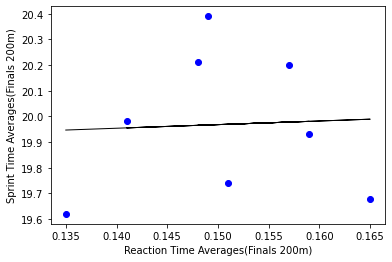

In [322]:
plt.plot(rtimefinals200m,stimefinals200m,'bo')
c1,c0=np.polyfit(rtimefinals200m,stimefinals200m,deg=1)
plt.plot(rtimefinals200m,c0 + c1*rtimefinals200m,'k-',lw=1)
plt.xlabel("Reaction Time Averages(Finals 200m)")
plt.ylabel("Sprint Time Averages(Finals 200m)");

In [323]:
compute_R2(rtimefinals200m,stimefinals200m)

0.0024090590731444934

So, this is not going the way we expected it to be , this is due to the fact that the sample size for finals is less than that of heats and semis, so we will get some unexpected results.

### Now, let's do the same analysis for the 400m (heats,semis and finals)

In [227]:
h400m_df=pd.read_csv('heat400m.csv', header= None , sep = ',')

In [228]:
h400m_df.columns=['Athelete','Country','Reaction Time','Sprint Time']
h400m_df

,Athelete,Country,Reaction Time,Sprint Time
0,Isaac Makwala,Botswana,0.197,44.86
1,Kirani James,Grenada,0.160,45.09
2,Jonathan Sacoor,Belgium,0.151,45.41
3,Demish Gaye,Jamaica,0.165,45.49
4,Alonzo Russell,Bahamas,0.223,45.51
5,Alex Beck,Australia,0.160,45.54
6,Ricardo dos Santos,Portugal,0.140,46.83
7,Bachir Mahamat,Chad,0.206,47.93
8,Mazen Al-Yassin,Saudi Arabia,0.163,45.16
9,Kevin Borlée,Belgium,0.126,45.36


In [229]:
stime_avg = h400m_df["Sprint Time"].mean()
stime_avg ##This is the mean Sprint Time in 400m heats.

45.943260869565215

In [231]:
rtime_avg = h400m_df["Reaction Time"].mean()
rtime_avg ##This is the mean Reaction Time in 400m heats.

0.17234782608695653

In [232]:
rtime400m= h400m_df['Reaction Time']

In [233]:
stime400m= h400m_df['Sprint Time']

### Let's plot the average reaction time.

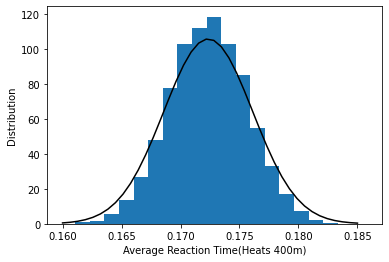

In [236]:
collect_samples(rtime400m,25,10000)
avgs=collect_samples(rtime400m,25,10000)
plt.hist(avgs,bins=20, density=True)
xs = np.linspace(0.160,0.185, 40)
mean_xbar = np.mean(rtime400m)
std_xbar = np.std(rtime400m, ddof=1)/np.sqrt(40) # 40 is the sample size 
ys = st.norm.pdf(xs,mean_xbar,std_xbar)
plt.ylabel("Distribution")
plt.xlabel("Average Reaction Time(Heats 400m)")
plt.plot(xs,ys,'k')
plt.show()

So, we can clearly see that the averages of the reaction time which in this case is our random variable resembles a gaussian distribution. 

### Let's do the same with Sprint Time

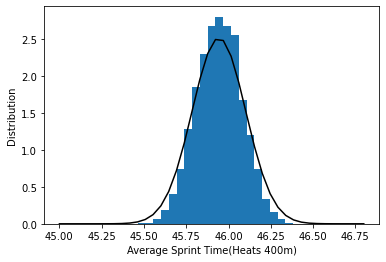

In [240]:
collect_samples(stime400m,25,10000)
avgs=collect_samples(stime400m,25,10000)
plt.hist(avgs,bins=20, density=True)
xs = np.linspace(45,46.8, 40)
mean_xbar = np.mean(stime400m)
std_xbar = np.std(stime400m, ddof=1)/np.sqrt(40) # 40 is the sample size 
ys = st.norm.pdf(xs,mean_xbar,std_xbar)
plt.ylabel("Distribution")
plt.xlabel("Average Sprint Time(Heats 400m)")
plt.plot(xs,ys,'k')
plt.show()

So, we can clearly see that the averages of the sprint time which in this case is our random variable resembles a gaussian distribution. 

### Let's do the regression part

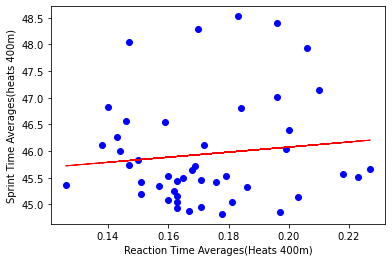

In [241]:
plt.plot(rtime400m,stime400m,'bo')
c1,c0=np.polyfit(rtime400m,stime400m,deg=1)
plt.plot(rtime400m,c0 + c1*rtime400m,'red',lw=1)
plt.xlabel("Reaction Time Averages(Heats 400m)")
plt.ylabel("Sprint Time Averages(heats 400m)");

#### Let's compute the coefficient of co-relation for the same.

In [242]:
compute_R2(rtime400m,stime400m)

0.012865318218357454

### Now, onto the Semis 400m.

In [264]:
semis400m_df=pd.read_csv('semis400m.csv', header= None , sep = ',')

In [245]:
semis400m_df.columns=['Athelete','Country','Reaction Time','Sprint Time']
semis400m_df

,Athelete,Country,Reaction Time,Sprint Time
0,Michael Cherry,United States,0.162,44.44
1,Christopher Taylor,Jamaica,0.164,44.92
2,Steven Solomon,Australia,0.168,45.15
3,Mazen Al-Yassin,Saudi Arabia,0.154,45.37
4,Leungo Scotch,Botswana,0.178,45.56
5,Machel Cedenio,Trinidad and Tobago,0.192,45.86
6,Alonzo Russell,Bahamas,0.169,46.04
7,Kirani James,Grenada,0.160,43.88
8,Anthony Zambrano,Colombia,0.175,43.93
9,Liemarvin Bonevacia,Netherlands,0.160,44.62


In [246]:
stime_avg = semis400m_df["Sprint Time"].mean()
stime_avg ##This is the mean Sprint Time in 400m semis.

45.056086956521746

In [247]:
rtime_avg = semis400m_df["Reaction Time"].mean()
rtime_avg ##This is the mean Reaction Time in 400m semis.

0.17408695652173914

In [248]:
rtimesemi400m= semis400m_df['Reaction Time']

In [249]:
stimesemi400m= semis400m_df['Sprint Time']

#### Plotting the average of reaction time for (400m semis.)

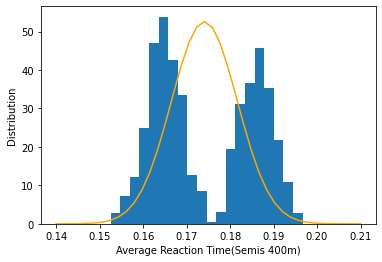

In [276]:
avgs=collect_samples(rtimesemi400m,10,1000)
plt.hist(avgs,bins=20, density=True)
xs = np.linspace(0.140,0.21, 40)
mean_xbar = np.mean(rtimesemi400m)
std_xbar = np.std(rtimesemi400m, ddof=1)/np.sqrt(40) # 40 is the sample size 
ys = st.norm.pdf(xs,mean_xbar,std_xbar)
plt.ylabel("Distribution")
plt.xlabel("Average Reaction Time(Semis 400m)")
plt.plot(xs,ys,'orange')
plt.show()

#### Plotting the sprint time average for Semis 400m.

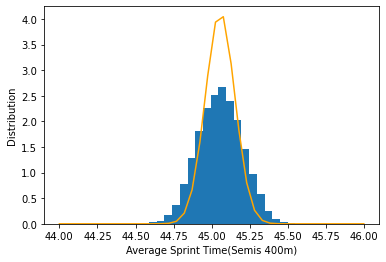

In [258]:
collect_samples(stimesemi400m,10,10000)
avgs=collect_samples(stimesemi400m,10,10000)
plt.hist(avgs,bins=20, density=True)
xs = np.linspace(44,46, 40)
mean_xbar = np.mean(stimesemi400m)
std_xbar = np.std(stimesemi400m, ddof=1)/np.sqrt(40) # 40 is the sample size 
ys = st.norm.pdf(xs,mean_xbar,std_xbar)
plt.ylabel("Distribution")
plt.xlabel("Average Sprint Time(Semis 400m)")
plt.plot(xs,ys,'orange')
plt.show()

#### Linear regression model for the same:

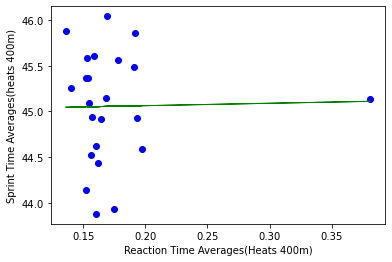

In [260]:
plt.plot(rtimesemi400m,stimesemi400m,'bo')
c1,c0=np.polyfit(rtimesemi400m,stimesemi400m,deg=1)
plt.plot(rtimesemi400m,c0 + c1*rtimesemi400m,'green',lw=1)
plt.xlabel("Reaction Time Averages(Heats 400m)")
plt.ylabel("Sprint Time Averages(heats 400m)");

#### Let us also calculate the coefficient of corelation for the above model. (R^2).

In [263]:
compute_R2(rtimesemi400m,stimesemi400m)

0.00042582358281738347

So, we can see that the linear model is really a bad fit for this, thus we can conclude that their is no such linear relationship between sprint time and reaction time.

### Lastly, the 400m finals.

In [265]:
finals400m_df=pd.read_csv('finals400m.csv', header= None , sep = ',')

In [266]:
finals400m_df.columns=['Athelete','Country','Reaction Time','Sprint Time']
finals400m_df

,Athelete,Country,Reaction Time,Sprint Time
0,Steven Gardiner,Bahamas,0.179,43.85
1,Anthony Zambrano,Colombia,0.166,44.08
2,Kirani James,Grenada,0.157,44.19
3,Michael Cherry,United States,0.179,44.21
4,Michael Norman,United States,0.148,44.31
5,Christopher Taylor,Jamaica,0.158,44.79
6,Isaac Makwala,Botswana,0.167,44.94
7,Liemarvin Bonevacia,Netherlands,0.168,45.07


In [268]:
rtimefinal400m = finals400m_df['Reaction Time']
stimefinal400m = finals400m_df['Sprint Time']

#### Plotting the average reaction time for Finals 400m.

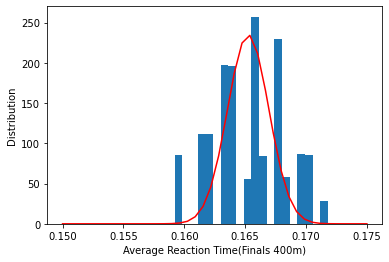

In [286]:
collect_samples(rtimefinal400m,5,100000)
avgs=collect_samples(rtimefinal400m,5,100000)
plt.hist(avgs,bins=20, density=True)
xs = np.linspace(0.15,0.175, 40)
mean_xbar = np.mean(rtimefinal400m)
std_xbar = np.std(rtimefinal400m, ddof=1)/np.sqrt(40) # 40 is the sample size 
ys = st.norm.pdf(xs,mean_xbar,std_xbar)
plt.ylabel("Distribution")
plt.xlabel("Average Reaction Time(Finals 400m)")
plt.plot(xs,ys,'red')
plt.show()

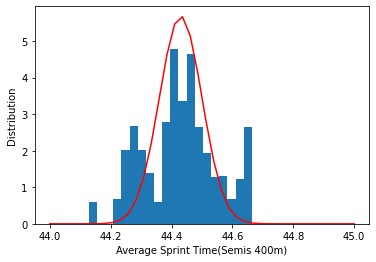

In [287]:
avgs=collect_samples(stimefinal400m,5,10000)
plt.hist(avgs,bins=20, density=True)
xs = np.linspace(44,45, 40)
mean_xbar = np.mean(stimefinal400m)
std_xbar = np.std(stimefinal400m, ddof=1)/np.sqrt(40) # 40 is the sample size 
ys = st.norm.pdf(xs,mean_xbar,std_xbar)
plt.ylabel("Distribution")
plt.xlabel("Average Sprint Time(Semis 400m)")
plt.plot(xs,ys,'red')
plt.show()

### Linear Regression Model :

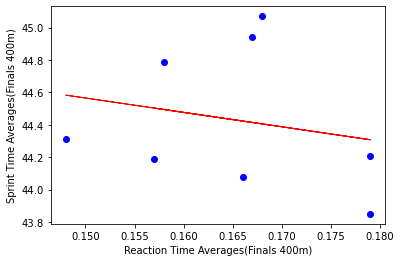

In [288]:
plt.plot(rtimefinal400m,stimefinal400m,'bo')
c1,c0=np.polyfit(rtimefinal400m,stimefinal400m,deg=1)
plt.plot(rtimefinal400m,c0 + c1*rtimefinal400m,'red',lw=1)
plt.xlabel("Reaction Time Averages(Finals 400m)")
plt.ylabel("Sprint Time Averages(Finals 400m)");

In [289]:
compute_R2(rtimefinal400m,stimefinal400m)

0.046180380419140334

Again, this is a very bad fit , the value of R^2 is close to 0.05, therefore we can conclude that there is no such linear relationship between sprint time and reaction time for 400m finals.

### Final Conclusion of Part 2:
We see that the coefficient of co-relation, i.e., R^2 is very less in all the cases (heats, semis , finals of both 200m and 400m) and thus implying that a linear relationship between two of them is indeed a bad fit.

Finally,the Thank you note..,So we would also like to express our gratitude to Prof.Amuthan A Ramabathiran for providing such an awesome hands-on project that gave us an insight into the world of Data analysis and Interpretation. The tasks such as visualising the true distribution, Computing the sampling distributionto calculate the estimates of Point parameters and Confidence intervals,Performing regression, and finally formulating and testing our very own hypothesis, using the concepts that we learnt in class and applying them in this project was a whole different feeling.
 Thank You Sir!! :)

## CONCLUSION

There are several things which could have been done better to make the results more comprehensive:<br>
<ul>
    <li>The data collected has only the Top 20 countries, which may not give a fair estimation, thus one way to make our results better is to include all participating countries</li>
    <li>The data used of the Economy of the country, different countries have different percentage of budget allocated to sports, thus to get better estimates we could use just the sport budget and the per capita sports budget of the countries</li>
    <li>For part2, we will be able to get better estimates when we use data from multiple Olympics, this will increase our dataset and give more conclusive results</li>
</ul>

## Contributions

Data collection and compilation- Lagnesh, Amit, Yash, Mayank <br>
part 1: Mayank,Amit<br>
part 2: Lagnesh, Yash<br>
Explainations, Intro: Yash<br>
Conclusion: Lagnesh,Amit<br>
Coding: Yash, Mayank